In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [31]:
neighbors = gpd.read_file('Neighborhoods_Files/Neighborhoods_.shp') # neighborhood shapes
trails = gpd.read_file('Trails/Parks_PARKS_OWNER_Trails.shp') # trails shapes
fields = gpd.read_file('Ballfields/Ballfields_PGH.shp') #baseball fields shapes
parks = gpd.read_file('Parks/PGHWebParks.shp')
emergency = gpd.read_file('Emergency Services/EmergencyServices.shp')
greenways = gpd.read_file('Greenways/Greenways.shp')

landslide = gpd.read_file('Landslide/Landslide_Prone.shp')
fire = gpd.read_file('Fire/pghdb_sde_Fire_Zones.shp')
flooding = gpd.read_file('Flooding/2014_FEMA_Flood_Zones.shp')
bridges = gpd.read_file('Bridges/PGHBridges.shp')
slope = gpd.read_file('Slope/Slope.shp')

nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]
print(nb.head())


                 name
0  Marshall-Shadeland
1    South Side Flats
2   South Side Slopes
3           Arlington
4       Lincoln Place


                   name  features
86  Squirrel Hill South        14
71        Highland Park        12
17     Allegheny Center         8
83           Bloomfield         8
62            Brookline         8


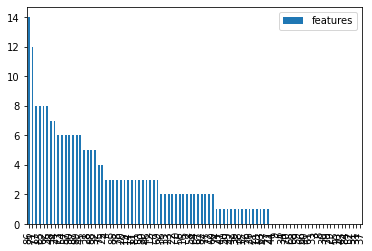

In [56]:
features = pd.read_csv('waterfeatures.csv')
features = features['neighborhood'] # select only the neighborhood column
# we want to count how many instances of each neighborhood are in features. 
# This will be essentially be a 'leaderboard' of water features
nb['features'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in features:
    # get neighborhood index 
    ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
    #print(len(inds), ind) 
    nb.loc[ind,'features'] += 1 # update accordingly
    
nb = nb.sort_values('features', ascending=False) # we sort by highest first

print(nb.head())

nb.plot.bar()